In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('diabetes.csv')
print(data.keys())
data.head(5)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(data['Outcome'].value_counts())
data.info()
#null 값 없음 , 전부 숫자형

Outcome
0    500
1    268
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score , recall_score , precision_recall_curve , f1_score , roc_curve , roc_auc_score
# 결측값 교체
def fillna(df):
    df['Age'].fillna(df['Age'].mean() , inplace = True)
    df['Cabin'].fillna('N' , inplace = True)
    df['Embarked'].fillna('N' , inplace = True)
    df['Fare'].fillna(0 , inplace = True)
    return df 
#불필요한 속성 제거
def drop(df):
    df.drop(['SkinThickness'] , axis = 1 , inplace = True)
    return df
# 레이블 인코딩 전처리
def encode(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin' , 'Sex' , 'Embarked']
    for feature in features:
        Label = LabelEncoder()
        Label = Label.fit(df[feature])
        df[feature] =Label.transform(df[feature])
    return df
    
def transform_features(df):
    df = fillna(df)
    df = drop(df)
    df = encode(df)
    return df
#Precision , Recall
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test , pred)
    print("오차 행렬")
    print(confusion)
    print("정확도 : {0:.4f} , 정밀도 : {1:.4f} , 재현율 : {2:.4f} ".format(accuracy , precision , recall))
    print("F1 : {0:.4f} ".format(f1))
#Precision Recall 지표
def precision_recall_curve_plot(y_test , pred):
    precisions , recalls , thresholds = precision_recall_curve(y_test , pred)
    plt.figure(figsize=(8 , 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds , precisions[0:thresholds_boundary] , label = 'precision' , linestyle = '--')
    plt.plot(thresholds , recalls[0:thresholds_boundary] , label = 'recall')
    #X축 Scale을 0.1 단위로 변경
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start , end , 0.1) , 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
#ROC 커브
def roc_curve_plot(y_test , pred):
    fprs , tprs, thresholds = roc_curve(y_test , pred)
    thr_idx = np.arange(1 , thresholds.shape[0] , 5)
    plt.plot(fprs , tprs , label = 'ROC')
    plt.plot([0 , 1] , [0 , 1] , 'k--' , label = 'Random')
    start , end = plt.xlim()
    plt.xticks(np.round(np.arange(start , end , 0.1),2))
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    print('ROC AUC 스코어 :' , roc_auc_score(y_test, pred) )
    

#thresholds = True 결정 조건
# thresholds가 높아질수록 정확도가 높아짐



오차 행렬
[[92 24]
 [ 8 30]]
정확도 : 0.7922 , 정밀도 : 0.5556 , 재현율 : 0.7895 
F1 : 0.6522 


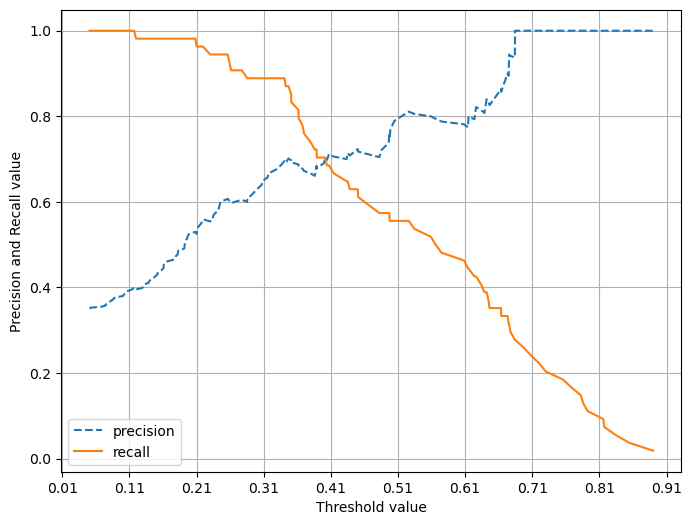

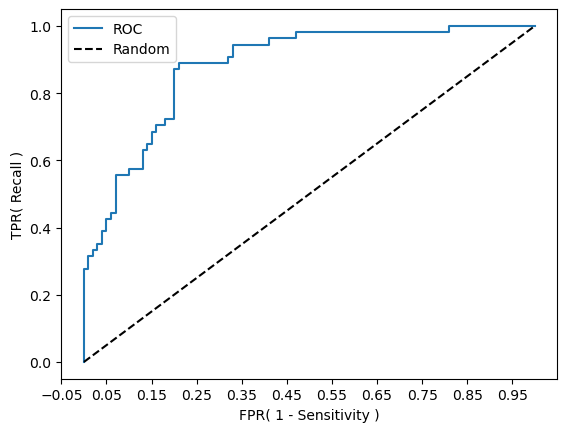

ROC AUC 스코어 : 0.88


In [12]:
from sklearn.preprocessing import Binarizer
y =  data['Outcome']
X = data.drop(['Outcome'] , axis = 1 , inplace = False)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state=0 , stratify=y)
logic = LogisticRegression(solver='liblinear')
logic.fit(X_train , y_train)
scores = logic.predict_proba(X_test)
scores = scores[:,1].reshape(-1,1)
Binarizer = Binarizer(threshold= 0.5).fit(scores)
pred = Binarizer.transform(scores)
get_clf_eval(pred , y_test)
precision_recall_curve_plot(y_test , scores )
roc_curve_plot(y_test , scores )



In [13]:
data.describe()

#min 값이 0이라는 이상한 값을 볼 수 있음.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


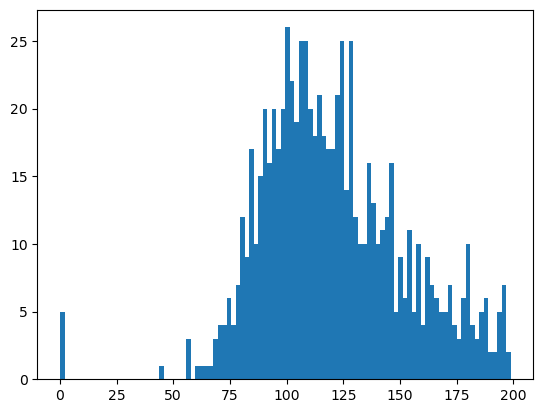

In [15]:
plt.hist(data['Glucose'] , bins = 100)
plt.show()

In [18]:
zero_features = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']
total_count = data['Glucose'].count()
for feature in zero_features:
    zero_count = data[data[feature] == 0][feature].count()
    print('{} 의 건수는 {} , 퍼센트는 {:.2f} % 입니다.'.format(feature , zero_count , zero_count / total_count * 100))

Glucose 의 건수는 5 , 퍼센트는 0.65 % 입니다.
BloodPressure 의 건수는 35 , 퍼센트는 4.56 % 입니다.
SkinThickness 의 건수는 227 , 퍼센트는 29.56 % 입니다.
Insulin 의 건수는 374 , 퍼센트는 48.70 % 입니다.
BMI 의 건수는 11 , 퍼센트는 1.43 % 입니다.


In [19]:
# 0 값을 평균값으로 대체

data[zero_features] = data[zero_features].replace(0 , data[zero_features].mean())

In [20]:
zero_features = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI']
total_count = data['Glucose'].count()
for feature in zero_features:
    zero_count = data[data[feature] == 0][feature].count()
    print('{} 의 건수는 {} , 퍼센트는 {:.2f} % 입니다.'.format(feature , zero_count , zero_count / total_count * 100))

Glucose 의 건수는 0 , 퍼센트는 0.00 % 입니다.
BloodPressure 의 건수는 0 , 퍼센트는 0.00 % 입니다.
SkinThickness 의 건수는 0 , 퍼센트는 0.00 % 입니다.
Insulin 의 건수는 0 , 퍼센트는 0.00 % 입니다.
BMI 의 건수는 0 , 퍼센트는 0.00 % 입니다.


오차 행렬
[[89 25]
 [11 29]]
정확도 : 0.7662 , 정밀도 : 0.5370 , 재현율 : 0.7250 
F1 : 0.6170 


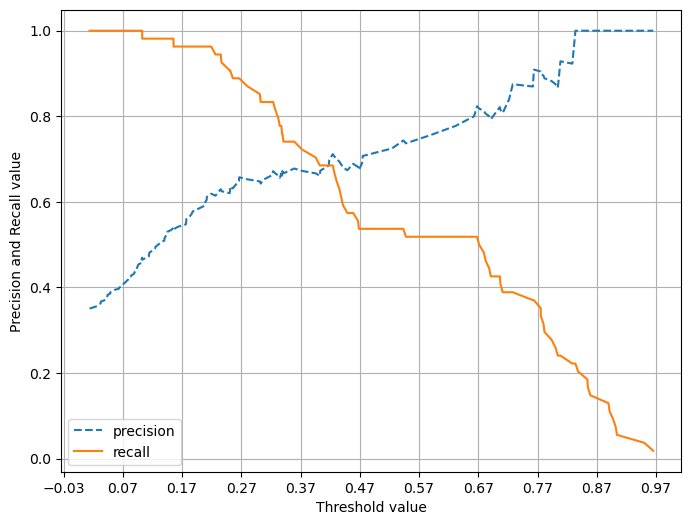

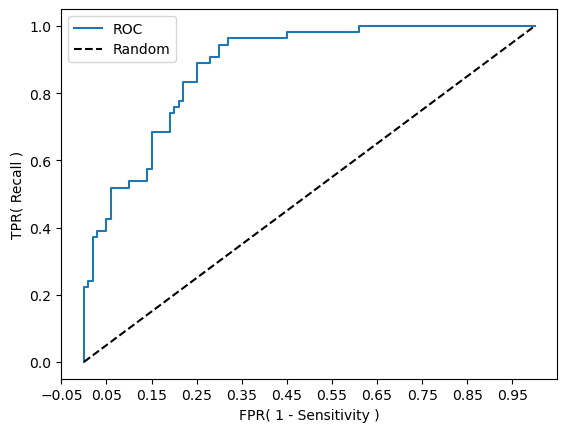

ROC AUC 스코어 : 0.8794444444444445


In [22]:
from sklearn.preprocessing import Binarizer
y =  data['Outcome']
X = data.drop(['Outcome'] , axis = 1 , inplace = False)

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state=0 , stratify=y)
logic = LogisticRegression(solver='liblinear')
logic.fit(X_train , y_train)
scores = logic.predict_proba(X_test)
scores = scores[:,1].reshape(-1,1)
Binarizer = Binarizer(threshold= 0.5).fit(scores)
pred = Binarizer.transform(scores)
get_clf_eval(pred , y_test)
precision_recall_curve_plot(y_test , scores )
roc_curve_plot(y_test , scores )



In [26]:
from sklearn.preprocessing import Binarizer
def get_eval_by_threshold(y_test , score , thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold= threshold).fit(score)
        pred = binarizer.transform(score)
        get_clf_eval(y_test ,pred)

thresholds = [0.3 , 0.33 , 0.36 , 0.39 , 0.42 , 0.45 , 0.48 , 0.5]
scores = logic.predict_proba(X_test)
get_eval_by_threshold(y_test , pred , thresholds)

오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662 , 정밀도 : 0.7250 , 재현율 : 0.5370 
F1 : 0.6170 
오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662 , 정밀도 : 0.7250 , 재현율 : 0.5370 
F1 : 0.6170 
오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662 , 정밀도 : 0.7250 , 재현율 : 0.5370 
F1 : 0.6170 
오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662 , 정밀도 : 0.7250 , 재현율 : 0.5370 
F1 : 0.6170 
오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662 , 정밀도 : 0.7250 , 재현율 : 0.5370 
F1 : 0.6170 
오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662 , 정밀도 : 0.7250 , 재현율 : 0.5370 
F1 : 0.6170 
오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662 , 정밀도 : 0.7250 , 재현율 : 0.5370 
F1 : 0.6170 
오차 행렬
[[89 11]
 [25 29]]
정확도 : 0.7662 , 정밀도 : 0.7250 , 재현율 : 0.5370 
F1 : 0.6170 
